In [1]:
import numpy as np 
import pandas as pd

In [2]:
train=pd.read_csv('aug_train.csv')
test=pd.read_csv('aug_test.csv')

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
train.shape

(19158, 14)

In [6]:
test.shape

(2129, 13)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [9]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
def fill_with_mode(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include='object').columns:
    fill_with_mode(train,i)
for j in test.select_dtypes(include='object').columns:
    fill_with_mode(test,j)

In [12]:
def fill_with_median(dataframe, colname):
    mode = dataframe[colname].median()
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(train,i)
for j in test.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(test,j)

In [13]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

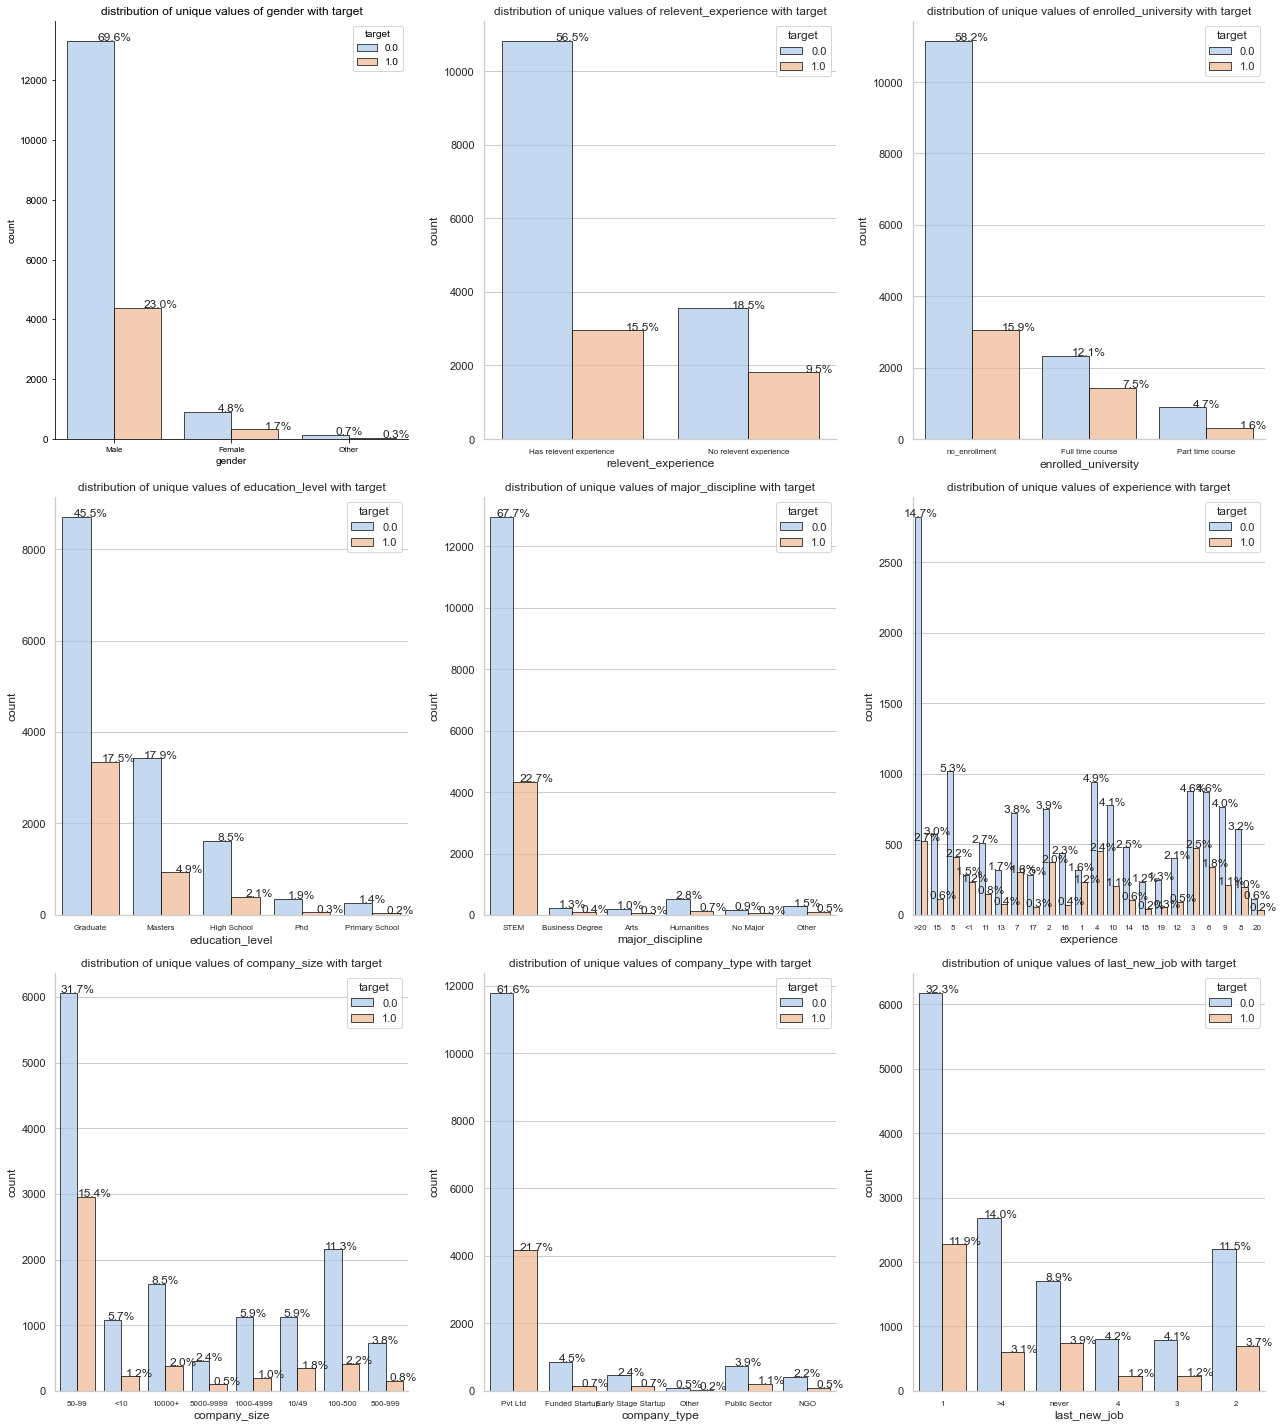

In [15]:
plt.figure(figsize=[18,20])
variables= ['gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']
total = float(len(train))
n=1
for v in variables:
    plt.subplot(3,3,n)
    ax=sns.countplot(x = v, data = train,hue='target', alpha=0.7, edgecolor='black', palette='pastel')
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.3)
    plt.title('distribution of unique values of {} with target'.format(v))
    plt.xticks(fontsize=8)
    plt.subplots_adjust(wspace=0.3)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    n=n+1
    plt.tight_layout()
    sns.despine()

plt.show()

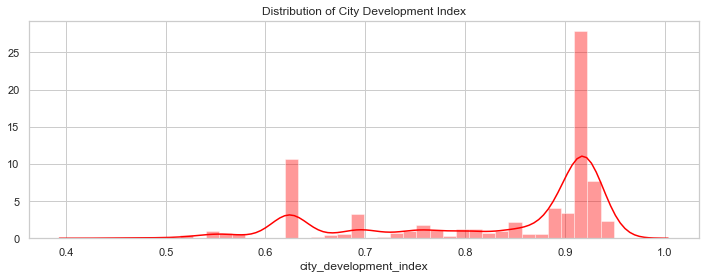

In [16]:
plt.figure(figsize=[12,4])
sns.distplot(train['city_development_index'], color='red')
plt.title('Distribution of City Development Index')
plt.show()

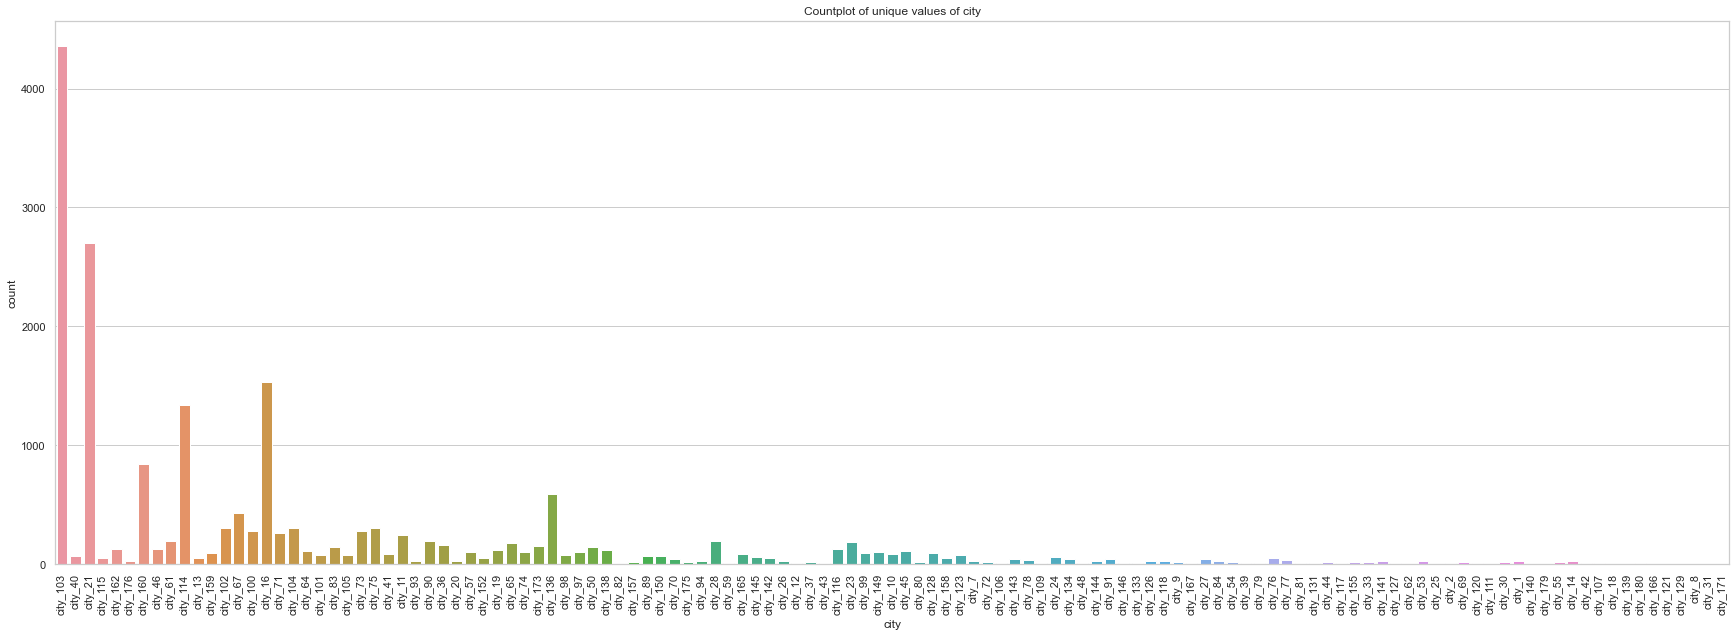

In [17]:
plt.figure(figsize=[30,10])
sns.countplot(x='city', data=train)
plt.title('Countplot of unique values of city')
plt.xticks(rotation=90)
plt.show()

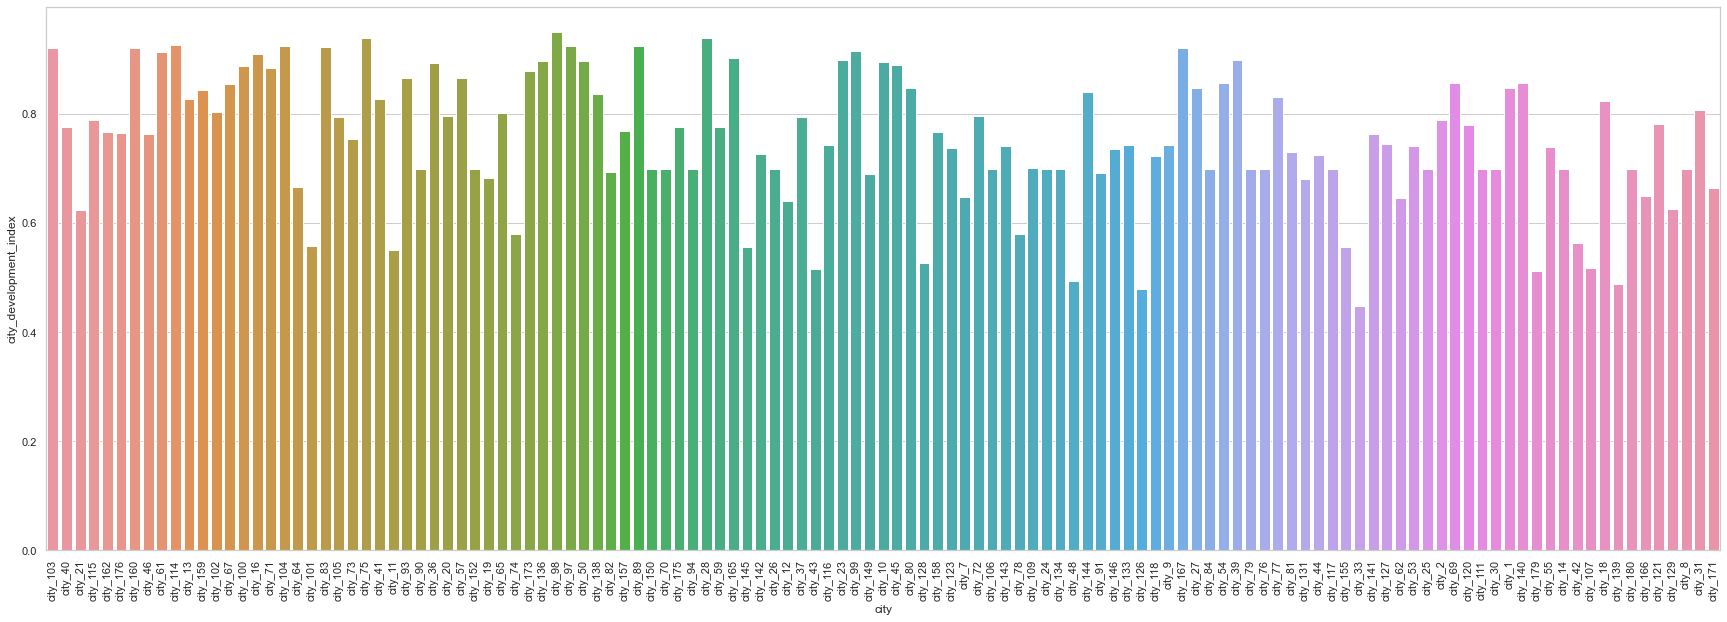

In [18]:
plt.figure(figsize=[30,10])
sns.barplot(data=train, x='city', y='city_development_index')
plt.xticks(rotation=90)
plt.show()

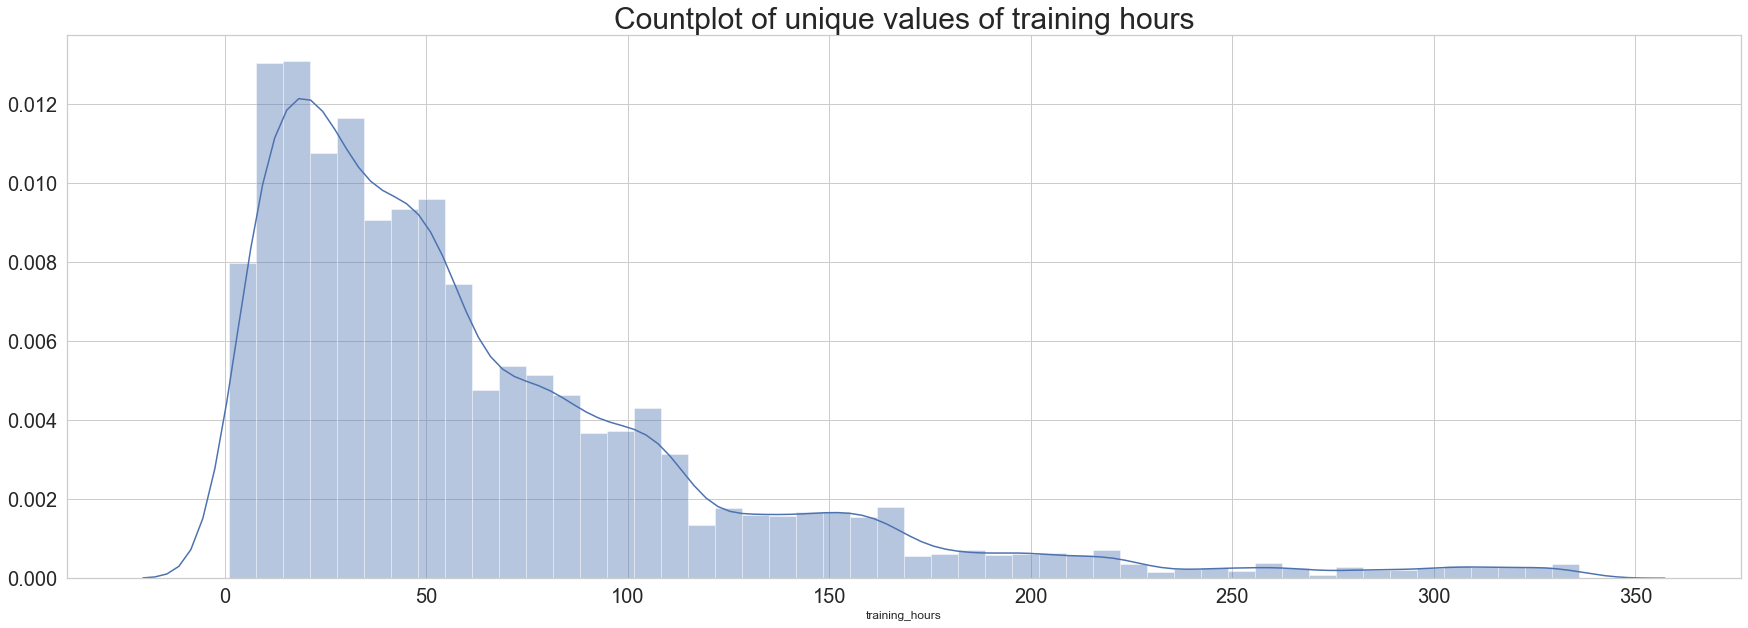

In [19]:
plt.figure(figsize=[30,10])
sns.distplot(train['training_hours'])
plt.title('Countplot of unique values of training hours', fontsize='30')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

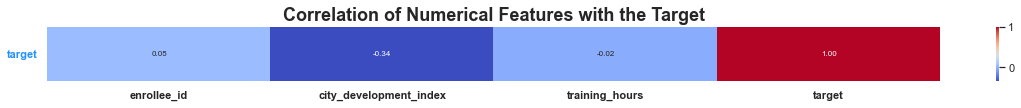

In [20]:
plt.figure(figsize=(20,1))
sns.heatmap(train.corr().sort_values(by = ['target'], ascending = False).head(1), cmap='coolwarm', annot=True, annot_kws={'size': 8}, fmt = '.2f')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

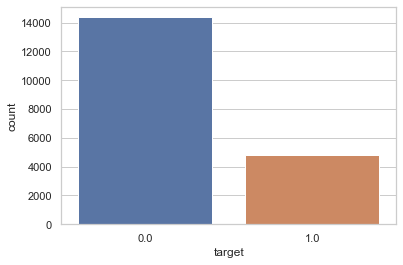

In [21]:
sns.countplot(x='target', data=train)
plt.show()

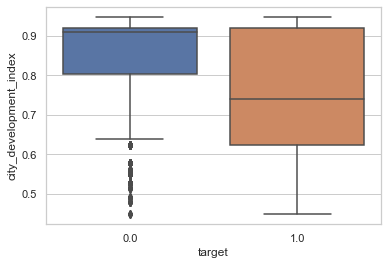

In [22]:
sns.boxplot(x='target', y='city_development_index', data=train)
plt.show()

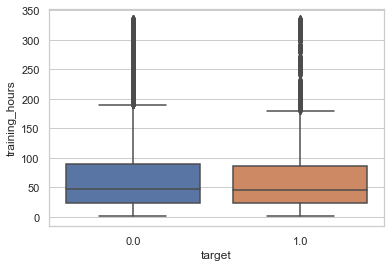

In [23]:
sns.boxplot(x='target', y='training_hours', data=train)
plt.show()

In [26]:
gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
}

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}

education_level_map={
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
} 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
train.loc[:,'education_level'] = train['education_level'].map(education_level_map)
train.loc[:,'company_size'] = train['company_size'].map(company_size_map)
train.loc[:,'company_type'] = train['company_type'].map(company_type_map)
train.loc[:,'last_new_job'] = train['last_new_job'].map(last_new_job_map)
train.loc[:,'major_discipline'] = train['major_discipline'].map(major_map)
train.loc[:,'enrolled_university'] = train['enrolled_university'].map(enrolled_university_map)
train.loc[:,'relevent_experience'] = train['relevent_experience'].map(relevent_experience_map)
train.loc[:,'gender'] = train['gender'].map(gender_map)
train.loc[:,'experience'] = train['experience'].map(experience_map)

#encoding city feature using label encoder
lb_en = LabelEncoder()

train.loc[:,'city'] = lb_en.fit_transform(train.loc[:,'city']) 
train.drop(['enrollee_id'], axis=1, inplace=True)

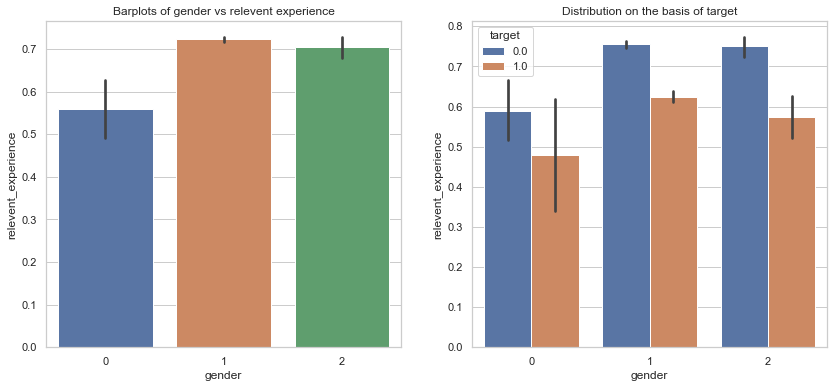

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='gender', y='relevent_experience')
plt.title('Barplots of gender vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=train, x='gender', y='relevent_experience', hue='target')
plt.title('Distribution on the basis of target')

plt.show()

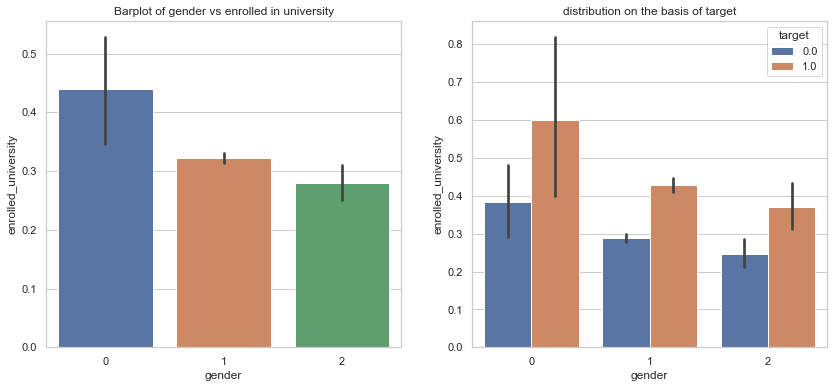

In [30]:
total = float(len(train))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='gender', y='enrolled_university')
plt.title('Barplot of gender vs enrolled in university')
plt.subplot(1,2,2)
sns.barplot(data=train, x='gender', y='enrolled_university', hue='target')
plt.title('distribution on the basis of target')

plt.show()

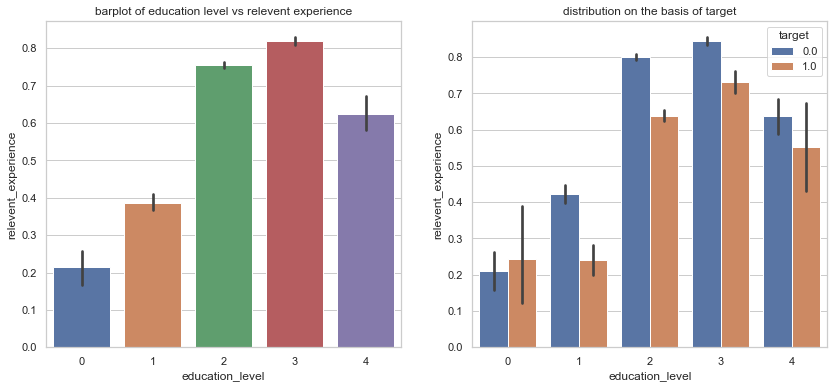

In [31]:
total = float(len(train))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='education_level', y='relevent_experience')
plt.title('barplot of education level vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=train, x='education_level', y='relevent_experience', hue='target')
plt.title('distribution on the basis of target')

plt.show()

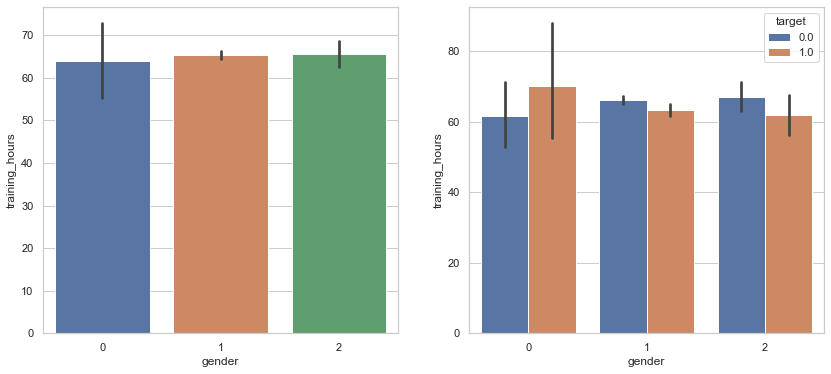

In [32]:
total = float(len(train))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, y='training_hours', x='gender')
plt.subplot(1,2,2)
sns.barplot(data=train, y='training_hours', x='gender', hue='target')

plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X = train.drop("target", axis=1)
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

In [35]:
gb = GaussianNB()
gb.fit(X_train,y_train)
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2877
         1.0       0.52      0.51      0.51       955

    accuracy                           0.76      3832
   macro avg       0.68      0.68      0.68      3832
weighted avg       0.76      0.76      0.76      3832



In [36]:
print(gb.score(X_train, y_train))


0.7605376484405585


In [39]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      2877
         1.0       0.59      0.28      0.38       955

    accuracy                           0.77      3832
   macro avg       0.69      0.61      0.62      3832
weighted avg       0.74      0.77      0.74      3832



In [40]:
print(lr.score(X_train, y_train))

0.765561790421506


In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      2877
         1.0       0.56      0.42      0.48       955

    accuracy                           0.77      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.77      0.76      3832



In [42]:
print(rfc.score(X_train, y_train))

0.9980425420853452


In [44]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
params = {
    'learning_rate': [0.05],
    'num_leaves': [90,140,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [3,4,5,6,7,8],
    'random_state' : [42], 
    'colsample_bytree' : [0.5,0.6,0.7,0.8,1.0],
    'subsample' : [0.5,0.6,0.7,0.8,1.0],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }
clf = lgb.LGBMClassifier()
RSCV = RandomizedSearchCV(clf,params,verbose=3,cv=10,n_jobs = -1,n_iter=10)
RSCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             1.0],
                                        'learning_rate': [0.05],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'metric': ['auc'],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 140, 200],
                                        'objective': ['binary'],
                                        'random_state': [42],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 1.0]},
                   verbose=3)

In [45]:
print(classification_report(y_test, RSCV.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2877
         1.0       0.59      0.47      0.52       955

    accuracy                           0.79      3832
   macro avg       0.71      0.68      0.69      3832
weighted avg       0.77      0.79      0.78      3832



In [46]:
print(RSCV.score(X_train, y_train))

0.7900952629518465


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, RSCV.predict(X_test))

0.7870563674321504

In [48]:
accuracy_score(y_test, rfc.predict(X_test))

0.7734864300626305

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
accuracy_score(y_test, xgb.predict(X_test))

0.7831419624217119

In [51]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      2877
         1.0       0.59      0.43      0.50       955

    accuracy                           0.78      3832
   macro avg       0.71      0.67      0.68      3832
weighted avg       0.77      0.78      0.77      3832



In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ThresholdedReLU

In [53]:
norm = tf.keras.layers.LayerNormalization(
    epsilon=0.001,
    center=True,
    scale=True
)

In [54]:
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.AUC(name='auc'),
]

In [55]:
model = Sequential()

model.add(norm)
model.add(ThresholdedReLU(theta=10)) # Theta is a threshold which determines the output result of a particular neuron.
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [57]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

479/479 [==============================] - 1s 2ms/step - loss: 0.6161 - accuracy: 0.7506
Epoch 2/10
479/479 [==============================] - 1s 2ms/step - loss: 0.5662 - accuracy: 0.7506
Epoch 3/10
479/479 [==============================] - 1s 2ms/step - loss: 0.5619 - accuracy: 0.7506
Epoch 4/10
479/479 [==============================] - 2s 4ms/step - loss: 0.5617 - accuracy: 0.7506
Epoch 5/10
479/479 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7506
Epoch 6/

In [59]:
model.evaluate(X_test, y_test)

120/120 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.7508


[0.5614835023880005, 0.7507829070091248]

In [61]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='binary', num_leaves=10, learning_rate=0.05, 
                      max_depth=1, n_estimators=50, boosting_type='goss') # You can play with hyperparameters, pay special attention to num_leaves, max_depth and n_estimators.
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [63]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, accuracy_score

#confusion_matrix(y_test, y_pred)
print('Accuracy: %f, \nRecall: %f \nPrecision: %f'
      % (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

Accuracy: 0.773486, 
Recall: 0.286911 
Precision: 0.594360
